In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Full Matrix

In [7]:
# Full Matrices
panteli = pd.read_csv("./full-distances/panteli.csv", header=None)
cantometrics = pd.read_csv("./full-distances/CantometricsDistNominal.csv")
cantometrics_ordinal = pd.read_csv("./full-distances/CantometricsDistOrdinal.csv")
musly = pd.read_csv("./full-distances/musly.csv", header=None)

cantometrics = pd.DataFrame(squareform(pdist(cantometrics)))

In [8]:
full_distance = np.zeros((4,4))

In [21]:
cantometrics_ordinal=cantometrics_ordinal.drop(labels=["Unnamed: 0"], axis=1)

In [22]:
import skbio.stats.distance as skb
from skbio import DistanceMatrix

In [31]:
# Panteli Canto Nominal
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,1] = p_value
full_distance[1,0] = coeff

In [32]:
# Panteli Canto Ordinal
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics_ordinal))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,2] = p_value
full_distance[2,0] = coeff

In [33]:
# Panteli musly
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,3] = p_value
full_distance[3,0] = coeff

In [34]:
# Canto canto-ordinal
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics_ordinal))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[1,2] = p_value
full_distance[2,1] = coeff

In [35]:
# Canto musly
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[1,3] = p_value
full_distance[3,1] = coeff

In [36]:
# canto-ordinal musly
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics_ordinal))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[2,3] = p_value
full_distance[3,2] = coeff

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


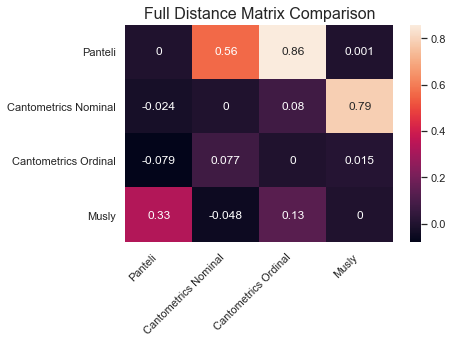

In [105]:
import seaborn as sns
sns.set()
g = sns.heatmap(full_distance, annot=True)
# To display the heatmap 
import matplotlib.pyplot as plt
ticks = ["Panteli","Cantometrics Nominal","Cantometrics Ordinal", "Musly"]
# plt.xticks(np.arange(5),("Panteli","Cantometrics Nominal","Cantometrics Nominal", "Musly"),rotation="45")
# plt.yticks(np.arange(5),("Panteli","Cantometrics Nominal","Cantometrics Nominal", "Musly"), rotation="horizontal")
plt.margins(0.2)
g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
ax = plt.axes()
ax.set_title('Full Distance Matrix Comparison', fontsize=16)
plt.show()

# Partial Matrices Flattened

In [64]:
# Partial Matrices
panteli_partial = pd.read_csv("./partial-distances/panteli_partial.csv", header=None)
canto_partial = pd.read_csv("./partial-distances/canto_partial.csv").drop(columns=["Unnamed: 0"])
pairwise_partial = pd.read_csv("./partial-distances/average_pairwise_matrix.csv", header=None)
musly_partial = pd.read_csv("./partial-distances/musly_partial.csv",header=None)

In [78]:
partial = np.zeros((5,5))

for i in range(30):
    for j in range(30):
        if(i!=j):
            pairwise_partial.iloc[i,j]=100-pairwise_partial.iloc[i,j]

# Individual Partial Matrices
## Six 5x5 matrices

In [79]:
pairwise_partial_1 = pd.read_csv("./partial-distances/pairwise_partial_1.csv", header=None)
pairwise_partial_2 = pd.read_csv("./partial-distances/pairwise_partial_2.csv", header=None)
pairwise_partial_3 = pd.read_csv("./partial-distances/pairwise_partial_3.csv", header=None)
pairwise_partial_4 = pd.read_csv("./partial-distances/pairwise_partial_4.csv", header=None)
pairwise_partial_5 = pd.read_csv("./partial-distances/pairwise_partial_5.csv", header=None)
pairwise_partial_6 = pd.read_csv("./partial-distances/pairwise_partial_6.csv", header=None)

for i in range(5):
    for j in range(5):
        if(i!=j):
            pairwise_partial_1.iloc[i,j]=100-pairwise_partial_1.iloc[i,j]
            pairwise_partial_2.iloc[i,j]=100-pairwise_partial_2.iloc[i,j]
            pairwise_partial_3.iloc[i,j]=100-pairwise_partial_3.iloc[i,j]
            pairwise_partial_4.iloc[i,j]=100-pairwise_partial_4.iloc[i,j]
            pairwise_partial_5.iloc[i,j]=100-pairwise_partial_5.iloc[i,j]
            pairwise_partial_6.iloc[i,j]=100-pairwise_partial_6.iloc[i,j]

In [80]:
canto_partial_1 = cantometrics.iloc[0:5,0:5]
canto_partial_2 = cantometrics.iloc[5:10,5:10]
canto_partial_3 = cantometrics.iloc[10:15,10:15]
canto_partial_4 = cantometrics.iloc[15:20,15:20]
canto_partial_5 = cantometrics.iloc[20:25,20:25]
canto_partial_6 = cantometrics.iloc[25:30,25:30]

In [81]:
canto_partial_ordinal_1 = cantometrics_ordinal.iloc[0:5,0:5]
canto_partial_ordinal_2 = cantometrics_ordinal.iloc[5:10,5:10]
canto_partial_ordinal_3 = cantometrics_ordinal.iloc[10:15,10:15]
canto_partial_ordinal_4 = cantometrics_ordinal.iloc[15:20,15:20]
canto_partial_ordinal_5 = cantometrics_ordinal.iloc[20:25,20:25]
canto_partial_ordinal_6 = cantometrics_ordinal.iloc[25:30,25:30]

In [82]:
musly_partial_1 = musly_partial.iloc[0:5,0:5]
musly_partial_2 = musly_partial.iloc[5:10,5:10]
musly_partial_3 = musly_partial.iloc[10:15,10:15]
musly_partial_4 = musly_partial.iloc[15:20,15:20]
musly_partial_5 = musly_partial.iloc[20:25,20:25]
musly_partial_6 = musly_partial.iloc[25:30,25:30]

In [83]:
panteli_partial_1 = panteli_partial.iloc[0:5,0:5]
panteli_partial_2 = panteli_partial.iloc[5:10,5:10]
panteli_partial_3 = panteli_partial.iloc[10:15,10:15]
panteli_partial_4 = panteli_partial.iloc[15:20,15:20]
panteli_partial_5 = panteli_partial.iloc[20:25,20:25]
panteli_partial_6 = panteli_partial.iloc[25:30,25:30]

In [84]:
from skbio.stats.distance import mantel
from skbio import DistanceMatrix
import seaborn as sns

In [85]:
def visualize_distance_matrix(group_no, data):
    group_no = str(group_no)
    sns.set()
    g = sns.heatmap(data, annot=True)
    # To display the heatmap 
    import matplotlib.pyplot as plt
    ticks = ["Panteli","Cantometrics Nominal", "Cantometrics Ordinal", "Pairwise", "Musly"]
    plt.margins(0.2)
    # plt.gcf().subplots_adjust(bottom=0.25)
    g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
    g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
    ax = plt.axes()
    ax.set_title('Partial Distance Matrix Group '+group_no, fontsize=16)
    plt.savefig("./figs/partial-distance-matrices/partial_dist_"+group_no+".png")
    plt.show()

In [100]:
def populate_matrix(panteli_partial, canto_partial, canto_partial_ordinal, pairwise_partial, musly_partial):
    
    partial = np.zeros((5,5))

    # Panteli Canto Nominal
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(canto_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,1] = p_value
    partial[1,0] = coeff
    
    # Panteli Canto Ordinal
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(canto_partial_ordinal)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,2] = p_value
    partial[2,0] = coeff

    # Panteli Pairwise
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(pairwise_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,3] = p_value
    partial[3,0] = coeff

    # Panteli Musly
    x = DistanceMatrix(panteli_partial)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[0,4] = p_value
    partial[4,0] = coeff

     # Canto Canto Ordinal
    x = DistanceMatrix(canto_partial)
    y = DistanceMatrix(canto_partial_ordinal)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[1,2] = p_value
    partial[2,1] = coeff
    
    # Canto Pairwise
    x = DistanceMatrix(canto_partial)
    y = DistanceMatrix(pairwise_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[1,3] = p_value
    partial[3,1] = coeff

    # Canto Musly
    x = DistanceMatrix(canto_partial)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[1,4] = p_value
    partial[4,1] = coeff
    
     # Canto Ordinal Pairwise
    x = DistanceMatrix(canto_partial_ordinal)
    y = DistanceMatrix(pairwise_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[2,3] = p_value
    partial[3,2] = coeff
    
    # Canto Ordinal Musly
    x = DistanceMatrix(canto_partial_ordinal)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[2,4] = p_value
    partial[4,2] = coeff

    # Pairwise Musly
    x = DistanceMatrix(pairwise_partial)
    y = DistanceMatrix(musly_partial)
    coeff, p_value, n = mantel(x, y, alternative="greater")
    partial[3,4] = p_value
    partial[4,3] = coeff
    

    return partial

In [101]:
def flatten(df):
    flat = []
    for i in range(5):
        for j in range(5):
            if(i<j):
                flat.append(df.iloc[i,j])
    return flat

In [102]:
def flatten_df(df):
    flat = []
    for i in range(5):
        for j in range(5):
            if(i<j):
                flat.append(df[i,j])
    return flat

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


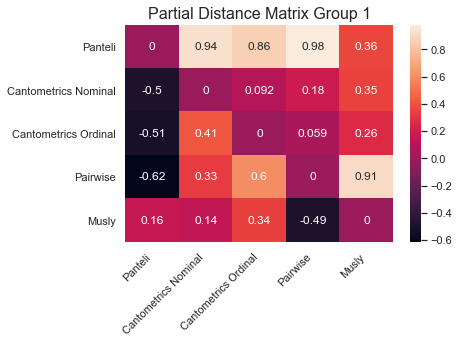

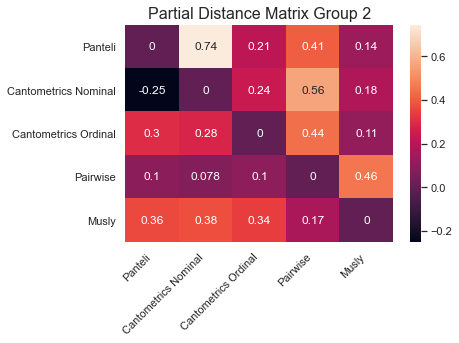

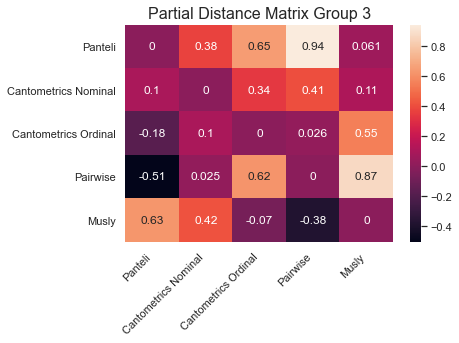

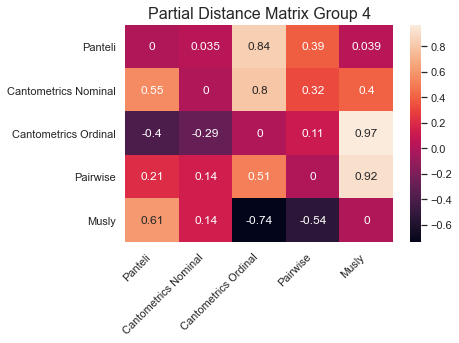

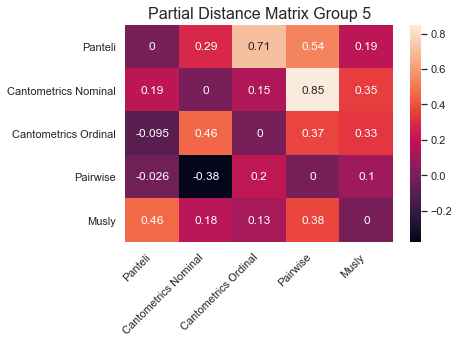

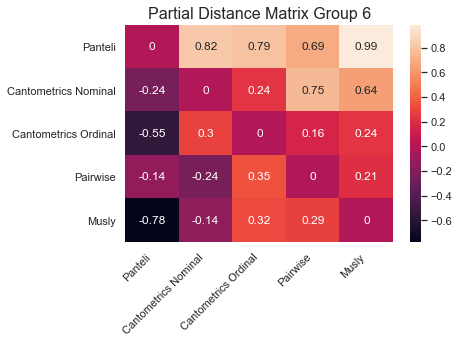

In [103]:
partial_1 = populate_matrix(panteli_partial_1, canto_partial_1, canto_partial_ordinal_1, pairwise_partial_1, musly_partial_1)
visualize_distance_matrix(1,partial_1)

partial_2 = populate_matrix(panteli_partial_2, canto_partial_2, canto_partial_ordinal_2, pairwise_partial_2, musly_partial_2)
visualize_distance_matrix(2,partial_2)

partial_3 = populate_matrix(panteli_partial_3, canto_partial_3, canto_partial_ordinal_3, pairwise_partial_3, musly_partial_3)
visualize_distance_matrix(3,partial_3)

partial_4 = populate_matrix(panteli_partial_4, canto_partial_4, canto_partial_ordinal_4, pairwise_partial_4, musly_partial_4)
visualize_distance_matrix(4,partial_4)

partial_5 = populate_matrix(panteli_partial_5, canto_partial_5, canto_partial_ordinal_5, pairwise_partial_5, musly_partial_5)
visualize_distance_matrix(5,partial_5)

partial_6 = populate_matrix(panteli_partial_6, canto_partial_6, canto_partial_ordinal_6, pairwise_partial_6, musly_partial_6)
visualize_distance_matrix(6,partial_6)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


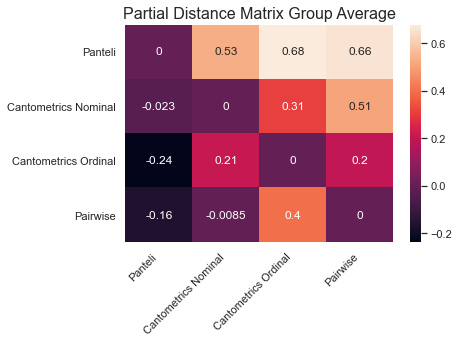

In [104]:
partial_average = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        partial_average[i,j] = (partial_1[i,j]+partial_2[i,j]+partial_3[i,j]+partial_4[i,j]+partial_5[i,j]+partial_6[i,j])/6
visualize_distance_matrix("Average",partial_average)

## Scatter Plots

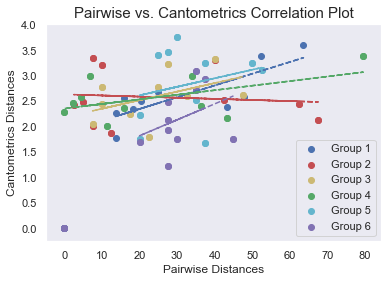

<Figure size 432x288 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

fig = plt.figure()
ax1 = fig.add_subplot(111)

b, m = polyfit(flatten(pairwise_partial_1), flatten_df(canto_partial_1), 1)
flat = flatten(pairwise_partial_1)
ax1.scatter(flat, flatten_df(canto_partial_1), c='b', label='Group 1')
ax1.plot(flat, b+[x*m for x in flat], "b--")


b, m = polyfit(flatten(pairwise_partial_2), flatten_df(canto_partial_2), 1)
flat = flatten(pairwise_partial_2)
ax1.scatter(pairwise_partial_2, canto_partial_2, c='r', label='Group 2')
ax1.plot(flat, b+[x*m for x in flat],"r--",)

b, m = polyfit(flatten(pairwise_partial_3), flatten_df(canto_partial_3), 1)
flat = flatten(pairwise_partial_3)
ax1.scatter(pairwise_partial_3, canto_partial_3, c='y', label='Group 3')
ax1.plot(flat, b+[x*m for x in flat],"--", c="y")

b, m = polyfit(flatten(pairwise_partial_4), flatten_df(canto_partial_4), 1)
flat = flatten(pairwise_partial_4)
ax1.scatter(pairwise_partial_4, canto_partial_4, c='g', label='Group 4')
ax1.plot(flat, b+[x*m for x in flat],"--",c="g")


b, m = polyfit(flatten(pairwise_partial_5), flatten_df(canto_partial_5), 1)
flat = flatten(pairwise_partial_5)
ax1.scatter(pairwise_partial_5, canto_partial_5, c='c', label='Group 5')
ax1.plot(flat, b+[x*m for x in flat],"--",c="c")

b, m = polyfit(flatten(pairwise_partial_6), flatten_df(canto_partial_6), 1)
flat = flatten(pairwise_partial_6)
ax1.scatter(pairwise_partial_6, canto_partial_6, c='m', label='Group 6')
ax1.plot(flat, b+[x*m for x in flat],"--",c="m")

ax1.grid(False)

plt.xlabel("Pairwise Distances");
plt.ylabel("Cantometrics Distances")
plt.title("Pairwise vs. Cantometrics Correlation Plot", fontsize=15)
plt.legend(loc='lower right');
plt.show()

plt.savefig("./figs/scatter.png")